In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

分析对象：

第7代游戏机：PS3 vs X360 vs Wii

第8代游戏机：PS4 vs XONE vs WiiU

目标：

1、通过可视化探索变量间的相关性

2、对 在不同游戏机上的游戏类型和销量 进行概括性统计和分析，观察哪个游戏机最强势

In [2]:
video = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
video.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# 一般性分析和数据清洗

缺失值检测与处理

In [4]:
video.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
video = video.dropna(axis=0)  # .dropna(axis=1) 删除带缺失值的样本（行）

In [6]:
video.info() # 观察数据类型， 发现User_score 是object，本应为数值型，因此要转换

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [7]:
video['User_Score'] = video['User_Score'].convert_objects(convert_numeric= True)

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [8]:
video.Platform.unique() # 有多种游戏机，但这里我们只取第7、8代游戏机来作分析

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

# 数值特征间的联合图及相关性

首先，试取Critic_Score 和 User_Score ，看看它们之间的相关关系. sns.jointplot()

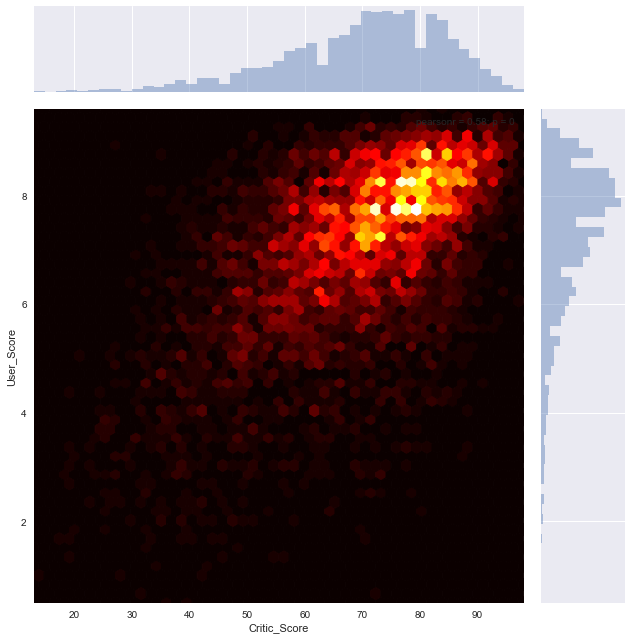

In [9]:
sns.jointplot(x='Critic_Score',y='User_Score',data=video,kind='hex', cmap= 'hot', size=9)
#video.plot(y= 'Critic_Score', x ='User_Score',kind='hexbin',gridsize=35, sharex=False, colormap='afmhot_r', title='Hexbin of Critic_Score and User_Score')

意料之中，评分和用户分 呈正相关

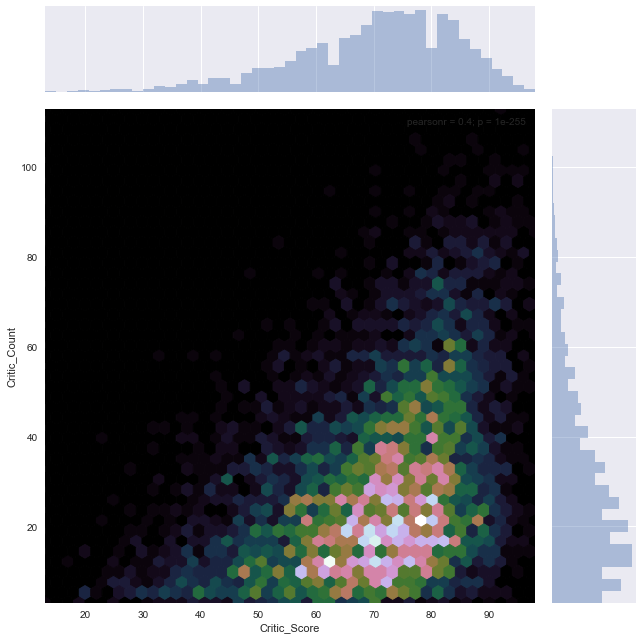

In [10]:
# 再看看Critic_Score 和 Critic_Count
sns.jointplot('Critic_Score','Critic_Count',data=video,kind='hex',cmap='cubehelix',size=9)

打20分以下和打90分以上的人数很少。绝大部分人都打80-90分。

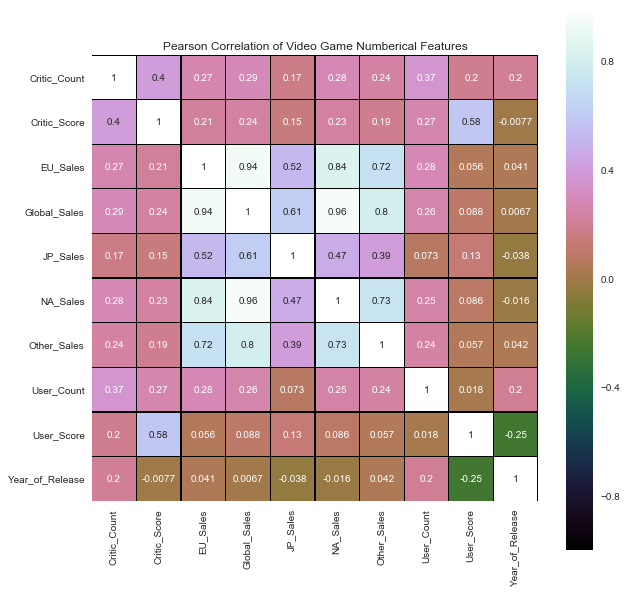

In [12]:
#最后，看看数值特征（两两）间的相关性。方法是画heatmap

str_list=[]
for colname,colvalue in video.iteritems(): #Iterator over (column name, Series) pairs.
    if type(colvalue[2]) == str:
           str_list.append(colname)
num_list = video.columns.difference(str_list)             
video_num = video[num_list]
f,ax=plt.subplots(figsize=(10,10))
plt.title('Pearson Correlation of Video Game Numberical Features')
sns.heatmap(video_num.astype(float).corr(),linewidths=0.25,vmax=1.0,square=True,
            cmap='cubehelix',linecolor='k',annot=True)

# 第7代游戏机

In [13]:
# 构造只含第7代游戏机的dataframe，注意这里用 或 |
video7th= video[(video['Platform'] == 'Wii') | (video['Platform']=='PS3')|(video['Platform']=='X360')]
video7th.shape

(2106, 16)

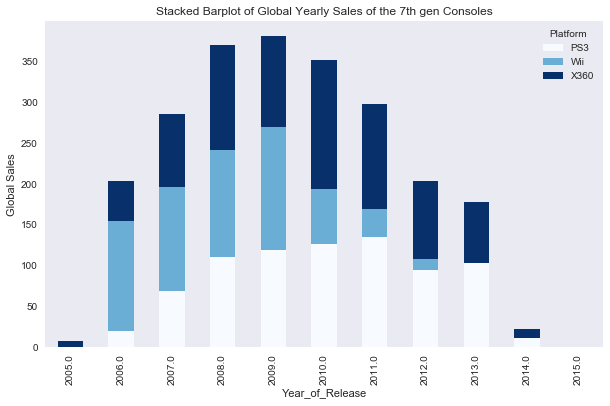

In [14]:
# 历年来的全球销量
# 堆叠型条形图

yearlySales=video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True,colormap='Blues',grid=False,figsize=(10,6))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th gen Consoles')
plt.ylabel('Global Sales')

趋势上看，PS3历年增长；X360的市场份额也呈现增长，在2009年有所下降；同时Wii在2006处于市场领先地位，但2007年开始，市场份额逐渐被另2家蚕食。

## 不同的游戏等级（E——每个人，M——成人，T——青少年），每个游戏平台产生的销量：

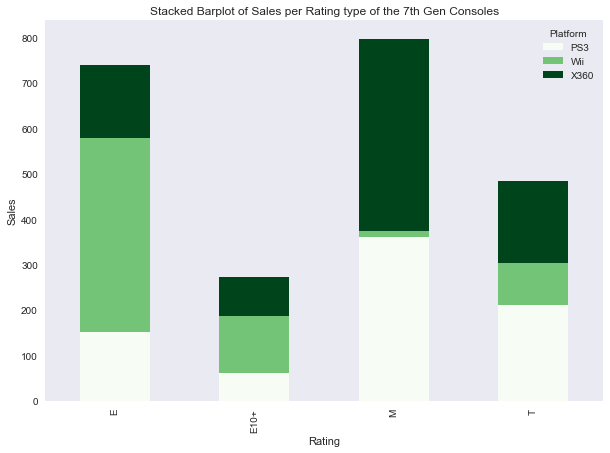

In [15]:
ratingSales=video7th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,colormap='Greens',grid=False,figsize=(10,7))
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')

直观可见：Wii主要面向家庭娱乐，因此E的销量最大，M微乎其微。PS3和X360卖出了最多的M级游戏。

## 根据游戏类型看各游戏机销量

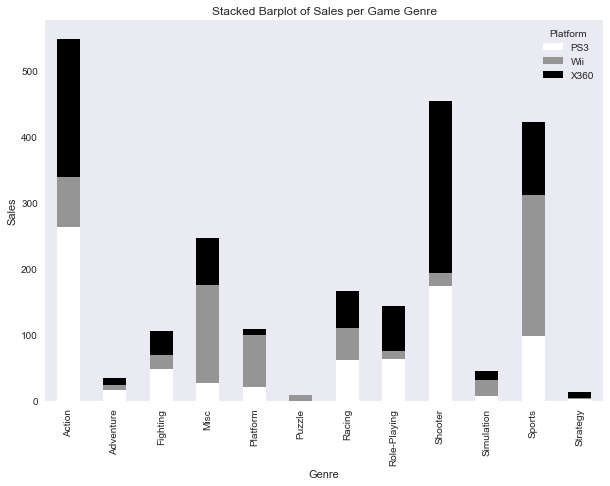

In [16]:
genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,colormap='Greys',grid=False,figsize=(10,7))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

动作类、射击类游戏，PS3和X360卖出最多，所以这2类游戏建议多投放在这两个平台。Wii主要集中在运动类游戏。

## 总销量和总用户数

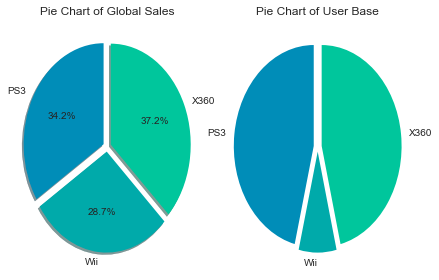

In [58]:
colors=['#008DB8','#00AAAA','#00C69C']
plt.subplot(121)
plt.pie(
    video7th.groupby('Platform').Global_Sales.sum(),#按平台划分总销量
    labels=video7th.groupby('Platform').Global_Sales.sum().index,# 标签为各游戏机名
    shadow=True,    # 有阴影
    colors=colors,
    explode=(0.05,0.05,0.05),
    startangle=90, #起点90度
    autopct='%1.1f%%'    # 后面两个%，第1个%效果同转义 \, autopct='%1.1f',.1f 表示保留小数点后1位
    )
plt.axis=('equal')
plt.title('Pie Chart of Global Sales')

plt.subplot(122)  # 若不另建子图，则两张饼图会重叠在一个subplot(121)
plt.pie(
   video7th.groupby('Platform').User_Count.sum(),
    labels=video7th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,    # 起线90度
    )                # 这里没有autopct 对比效果
plt.axis=('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.
plt.show()

第7代游戏机中，PS3 和X360 市场份额很相近，而Wii难以与之竞争。

# 第八代游戏主机

In [3]:
video.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
video8th=video[(video['Platform']=='WiiU') | (video['Platform']=='PS4')| (video['Platform']=='XOne')]
video8th.shape

(787, 16)

In [16]:
yearlySales=video8th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()

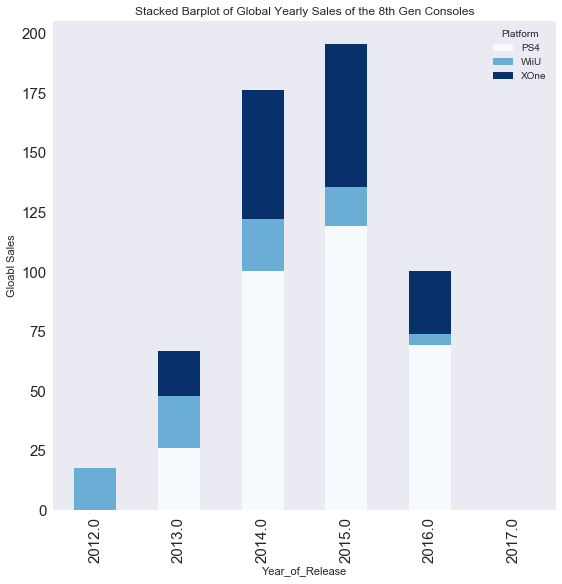

In [21]:
yearlySales.unstack().plot(kind='bar',stacked=True,colormap='Blues',grid=False,figsize=(9,9),
                          fontsize=15)
plt.title('Stacked Barplot of Global Yearly Sales of the 8th Gen Consoles')
plt.ylabel('Gloabl Sales')

In [22]:
ratingSales = video8th.groupby(['Rating','Platform']).Global_Sales.sum()

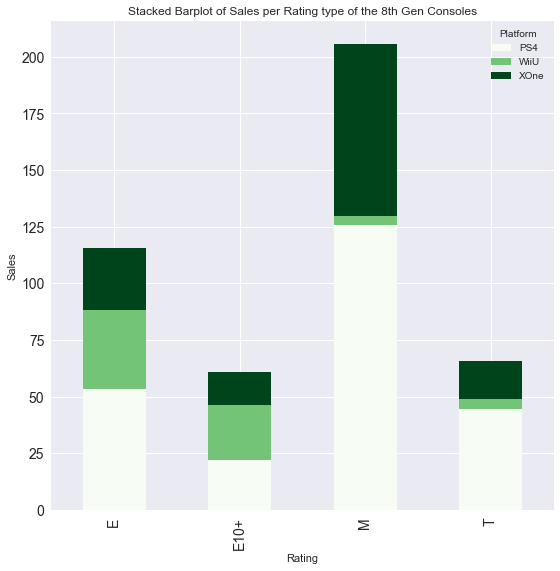

In [24]:
ratingSales.unstack().plot(kind='bar',stacked=True,colormap='Greens',figsize=(9,9),fontsize=14)
plt.title('Stacked Barplot of Sales per Rating type of the 8th Gen Consoles')
plt.ylabel('Sales')

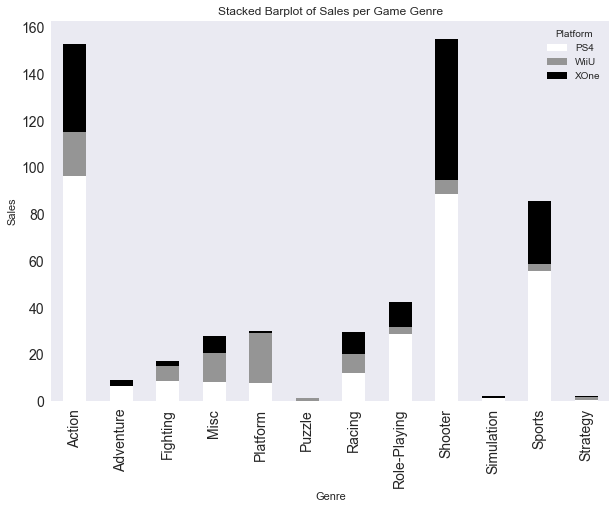

In [36]:
genreSales = video8th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,colormap='Greys',grid=False,figsize=(10,7),fontsize=14)
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

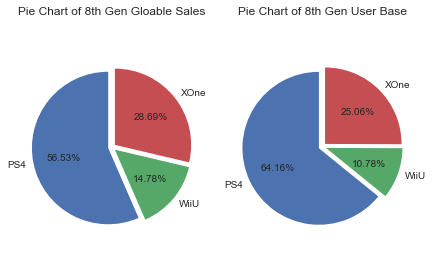

In [41]:
plt.subplot(121)
plt.pie(
    video8th.groupby('Platform').Global_Sales.sum(),
    labels=video8th.groupby('Platform').Global_Sales.sum().index,
    shadow=False,
    explode=(0.05,0.05,0.05),
    startangle=90,
    autopct='%.2f%%')
plt.axis('equal')
plt.title('Pie Chart of 8th Gen Gloable Sales')

plt.subplot(122)
plt.pie(
    video8th.groupby('Platform').User_Count.sum(),
    labels=video8th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    explode=(0.05,0.05,0.05),
    startangle=90,
    autopct='%.2f%%'
)
plt.axis('equal')
plt.title('Pie Chart of 8th Gen User Base')
plt.tight_layout()
plt.show()